In [38]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pprint import pprint
from random import shuffle
from sklearn.metrics import accuracy_score
from math import sqrt
from sklearn.cross_validation import KFold

In [2]:
df = pd.read_csv("chips.txt", header=None, names=["x", "y", "type"])
df['color'] = df['type'].map(lambda x: 'red' if x else 'blue')

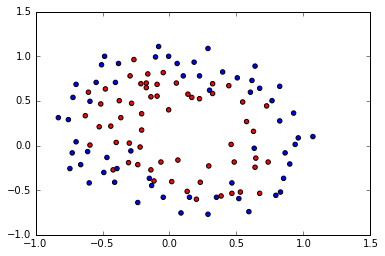

In [5]:
plt.scatter(df['x'], df['y'], c=df['color'])

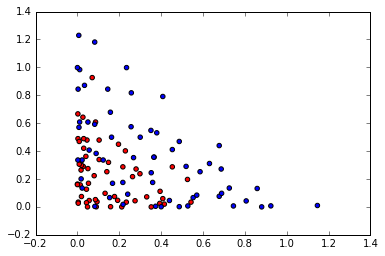

In [189]:
xx, yy = zip(*[(i[0]**2, i[1]**2) for i in zip(list(df['x']), list(df['y']))])
plt.scatter(xx, yy, c=df['color'])

In [98]:
def accuracy(theory, predictions):
    correct = 0
    for x in range(len(theory)):
        if theory[x][-1] == predictions[x]:
            correct += 1
    return correct/float(len(theory))

def f1score(theory, practice):
    tp, fn, fp, tn = 0, 0, 0, 0
    for i in range(len(theory)):
        tp += theory[i] == practice[i] and practice[i] == 1
        tn += theory[i] == practice[i] and practice[i] == 0
        fn = sum(practice) - tp
        fp = (len(practice) - sum(practice)) - tn
    precision = tp / (tp + fp)
    recall = tp / (tp + fn)
    return 2 * precision * recall / (precision + recall)

In [122]:
def euclidean(a, b):
    rv = 0
    for i in range(len(a)):
        rv += (a[i] - b[i]) ** 2
    return sqrt(rv)

def manhattan(a, b):
    rv = 0
    for i in range(len(a)):
        rv += abs(a[i] - b[i])
    return rv

In [106]:
class KNNClassifier():
    def __init__(self, k, distance):
        self.k = k;
        self.distance = distance
        
    def train(self, X, y):
        self.train_X = X
        self.train_y = y
        self.k = min(self.k, len(X))
        
    def predict(self, x):
        dist = []
        for i in range(len(self.train_X)):
            dist.append((self.distance(x, self.train_X[i]), self.train_y[i]))
        dist.sort()
        dist = dist[:self.k]
        #pprint(dist)
        r = {}
        for d in dist:
            r[d[1]] = r.get(d[1], 0) + 1
        return sorted(r, key = r.get, reverse=True)[0]

In [188]:
x_y_type = np.array(list(zip(df['x'], df['y'], df['type'])))
pprint(x_y_type.shape)
kf = KFold(len(x_y_type), n_folds=5,shuffle=True)
f1scores = []
for train_index, test_index in kf:
    knn = KNNClassifier(5, euclidean)
    cur_X = x_y_type[train_index][:, [0,1]]
    cur_y = x_y_type[train_index][:, 2].astype(int)
    knn.train(cur_X, cur_y)
    res = [knn.predict(x) for *x, y in x_y_type[test_index]]
    y = x_y_type[test_index][: , 2].astype(int)
    f1scores.append(f1score(y, res))
    
np.mean(f1scores)

(118, 3)


0.75433135704874821

In [216]:
r_phi_type = np.array(list(zip(xx, yy, df['type'])))
kf = KFold(len(r_phi_type), n_folds=5,shuffle=True)
f1scores = []
for train_index, test_index in kf:
    knn = KNNClassifier(5, manhattan)
    cur_X = r_phi_type[train_index][:, [0,1]]
    cur_y = r_phi_type[train_index][:, 2].astype(int)
    knn.train(cur_X, cur_y)
    res = [knn.predict(x) for *x, y in r_phi_type[test_index]]
    y = r_phi_type[test_index][: , 2].astype(int)
    f1scores.append(f1score(y, res))
    
np.mean(f1scores)

0.71817805383022781